# Velocity distribution and Radon Transform examples

### To-Do
- Implement Radon Transform calculation for generic f(v) and for discretised f(v)

## Speed and velocity distributions

In [1]:
import numpy as np
import MaxwellBoltzmann as MB

import matplotlib
import matplotlib.pyplot as pl
#Change default font size so you don't need a magnifying glass
matplotlib.rc('font', **{'size'   : 15})


Let's plot the speed distribution $f(v)$ and the velocity integral $\eta(v_\mathrm{min}) = \int_{v_\mathrm{min}} f(v)/v \, \mathrm{d}v$ for the standard Maxwell Boltzmann:

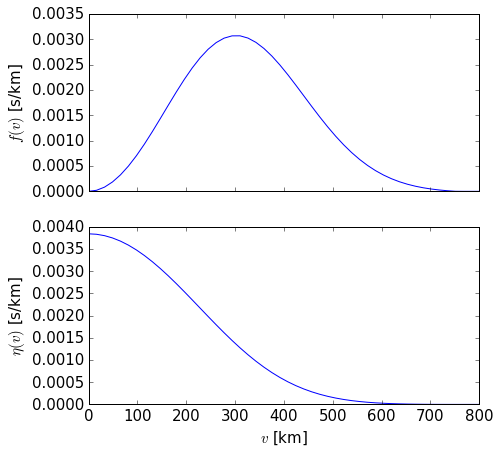

In [2]:
vlist = np.linspace(0, 800)

f, axarr = pl.subplots(2, sharex=True, figsize=(7,7))

axarr[0].plot(vlist, MB.SpeedDist(vlist))
axarr[0].set_ylabel(r'$f(v)$ [s/km]')

axarr[1].plot(vlist, MB.Eta(vlist))
axarr[1].set_ylabel(r'$\eta(v)$ [s/km]')
axarr[1].set_xlabel(r'$v$ [km]')
pl.show()

Now we plot the velocity distribution, as a function of v and $\theta$, the angle from the mean velocity (we'll set the $\phi$ angle equal to zero and then multiply by $2\pi$, as if we're integrating over $\phi$):

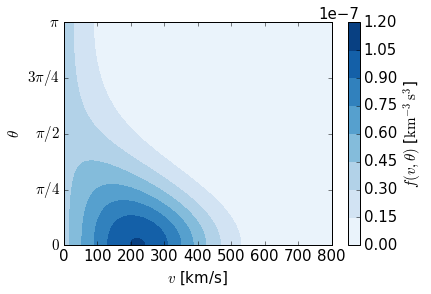

In [3]:
vlist = np.linspace(0, 800,201)
thetalist = np.linspace(0, np.pi,201)
vgrid,thetagrid = np.meshgrid(vlist, thetalist)

fig = pl.figure()
ax = fig.add_subplot(111)
pl.contourf(vgrid,thetagrid, 2.0*np.pi*MB.VelDist(vgrid, thetagrid,0), cmap="Blues")

ax.set_yticks([0, np.pi/4.0, np.pi/2.0, np.pi*3.0/4.0, np.pi])
ax.set_yticklabels([r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])

ax.set_xlabel(r"$v$ [km/s]")
ax.set_ylabel(r"$\theta$")

pl.colorbar(label= r'$f(v,\theta)$ [$\mathrm{km}^{-3} \,\mathrm{s}^3$]')
pl.show()

Finally, we'll check that everything is normalised properly (including the volume element of $v^2 \sin\theta$):

In [4]:
Norm = 2.0*np.pi*np.trapz(np.trapz(MB.VelDist(vgrid, thetagrid,0)*vgrid**2*np.sin(thetagrid), thetalist), vlist)
print "Velocity distribution is normalised to: ", Norm

Velocity distribution is normalised to:  0.999930435193


### Radon Transform for the Maxwell-Boltzmann distribution

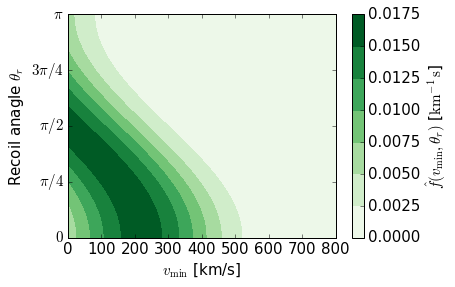

In [5]:
#Let's use the same definitions of vlist and thetalist that we had before, 
#but beware that they mean different things in this case (i.e. vmin and 
# theta, the recoil angle)
vlist = np.linspace(0, 800,201)
thetalist = np.linspace(0, np.pi,201)
vgrid,thetagrid = np.meshgrid(vlist, thetalist)

fig = pl.figure()
ax = fig.add_subplot(111)

#Again, we'll 'integrate' over phi by multiplying by 2pi
pl.contourf(vgrid,thetagrid, 2.0*np.pi*MB.RadonTransform(vgrid, thetagrid,0), cmap="Greens")

ax.set_yticks([0, np.pi/4.0, np.pi/2.0, np.pi*3.0/4.0, np.pi])
ax.set_yticklabels([r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])

ax.set_xlabel(r"$v_\mathrm{min}$ [km/s]")
ax.set_ylabel(r"Recoil anagle $\theta_r$")

pl.colorbar(label= r'$\hat{f}(v_\mathrm{min},\theta_r)$ [$\mathrm{km}^{-1} \,\mathrm{s}$]')
pl.show()

Now let's check that everything is consistent. We'll integrate the Radon Transform over the recoil angle $\theta_r$, and compare with the value for $\eta$ at $v_\mathrm{min} = 200$ km/s (they should be equal...):

In [6]:
v0 = 200
intRT = np.trapz(MB.RadonTransform(v0, thetalist,0)*np.sin(thetalist), thetalist)
print "Radon Transform (integrated over recoil angle) gives: ", intRT
print "Velocity integral (eta) gives: ", MB.Eta(v0)

Radon Transform (integrated over recoil angle) gives:  0.00249489908993
Velocity integral (eta) gives:  0.00249495279917
